**TASK 3**

**NEPTUNE ID : FDAW78**

**NAME : INDRA AWAL PRIYANTO**

In [1]:
#Download dataset from: https://drive.google.com/file/d/1Iimm_lRIQP90efBe_x6Uz-l3hkpRmyOx/view?usp=sharing
!gdown --id 1Iimm_lRIQP90efBe_x6Uz-l3hkpRmyOx
!unzip 3_hough.zip -d ./dataset

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Iimm_lRIQP90efBe_x6Uz-l3hkpRmyOx
To: /content/3_hough.zip
100% 196k/196k [00:00<00:00, 69.4MB/s]
Archive:  3_hough.zip
 extracting: ./dataset/blood.png     
  inflating: ./dataset/cable.png     
  inflating: ./dataset/cells.png     
  inflating: ./dataset/circles.png   


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import skimage.exposure
import skimage.io
import skimage.color
import skimage.filters
from PIL import Image
from matplotlib.pyplot import imshow, show, subplot, figure, gray, title, axis

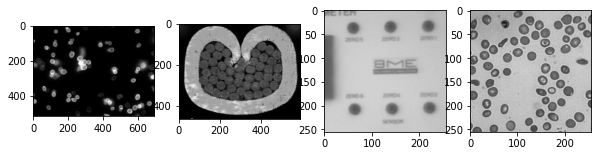

In [3]:
file = '/content/dataset/*.png' 
glob.glob(file)
images = [cv2.imread(image) for image in glob.glob(file)]

fig=plt.figure(figsize=(10, 10))
rows, cols = 1, 4
# Display all of images
for j in range(0, len(images)):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images[j])
plt.show()

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("/content/dataset/blood.png")
image2 = cv2.imread("/content/dataset/cable.png")
image3 = cv2.imread("/content/dataset/cells.png")
image4 = cv2.imread("/content/dataset/circles.png")

# imshow(image, cmap="gray")

In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import math
from collections import defaultdict

def circular_detection ( image , diameterRange ) :
    radiusRange = [ int ( elem / 2 ) for elem in diameterRange ]
    rangeMin = radiusRange [ 0 ]
    rangeMax =  radiusRange [ 1 ]
    row , column = image.shape

    accumulatorMatrix = np.zeros ( [ 2 * row , 2 * column , rangeMax + 1 ] )
    for r in radiusRange :
        for x in range ( row ) :
            for y in range ( column ) :
                if image [ x ] [ y ] != 0 :
                    for theta in range ( 0 , 360 ) :
                        b = y - r * np.sin ( theta * math.pi / 180 )
                        a = x - r * np.cos ( theta * math.pi / 180 )
                        accumulatorMatrix [ int ( a ) , int ( b ) , int ( r ) ] += 1  # voting

    accumulatorMatrix_ = np.sum ( accumulatorMatrix , axis = 2 )
    accumulatorMatrix_ = ( ( accumulatorMatrix_ - accumulatorMatrix_.min() ) *
                           ( 1.0 / (accumulatorMatrix_.max() - accumulatorMatrix_.min() ) * 255 ) ) # normalization

    accumulatorImage = accumulatorMatrix_ [ : row + 1 , : column + 1 ]
    max_value = np.max ( accumulatorMatrix )
    indices = np.argwhere ( accumulatorMatrix > ( max_value * 0.7 ) )

    return indices, accumulatorImage

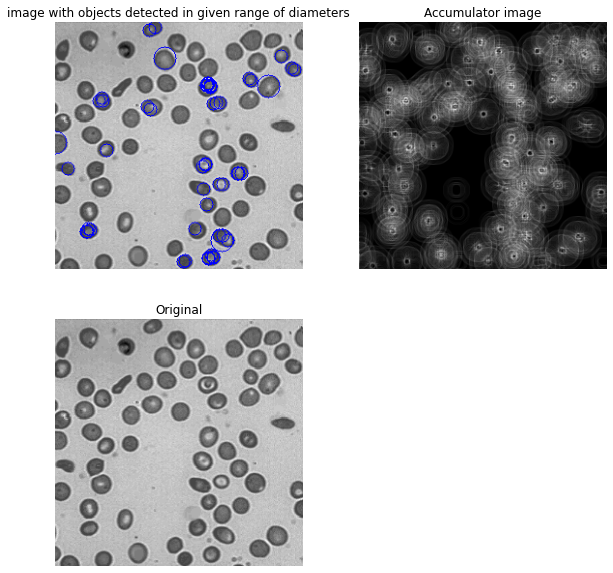

In [103]:
img = cv2.imread('/content/dataset/blood.png')
edgeDetected = cv2.Canny (img , 100 , 200)
# imshow(edgeDetected, cmap="gray")

indices, accumulatorImage = circular_detection( edgeDetected , [ 15 , 25 ] ) # circles 15-25

for x , y , r in indices :
    cv2.circle(img , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(img)
axis('off')
title('image with objects detected in given range of diameters')

fig.add_subplot(2, 2, 2)
imshow(accumulatorImage, cmap="gray")
axis('off')
title('Accumulator image')

fig.add_subplot(2, 2, 3)
imshow(image)
axis('off')
title('Original')

# fig.add_subplot(2, 2, 4)
# imshow(nms3)
# axis('off')
# title('Non-Maximum suppression')

show()

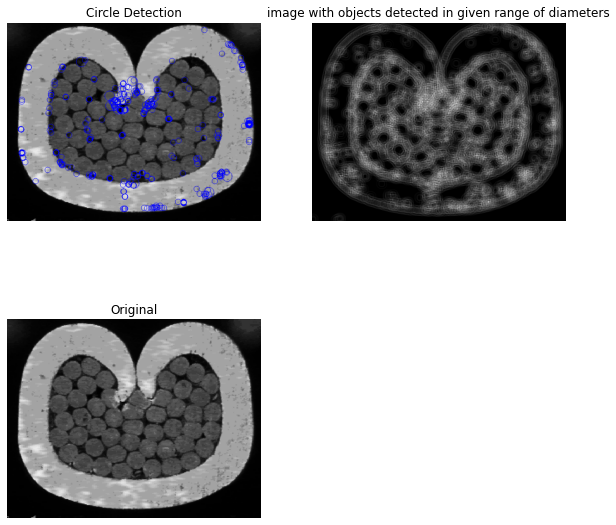

In [102]:
img2 = cv2.imread('/content/dataset/cable.png')
edgeDetected2 = cv2.Canny(img2 , 50 , 150)
# imshow(edgeDetected, cmap="gray")

indices2, accumulatorImage2 = circular_detection(edgeDetected2 , [ 15 , 25 ]) # circles 15-25

for x , y , r in indices2 :
    cv2.circle(img2 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(img2)
axis('off')
title('image with objects detected in given range of diameters')

fig.add_subplot(2, 2, 2)
imshow(accumulatorImage2, cmap="gray")
axis('off')
title('Accumulator image')

fig.add_subplot(2, 2, 3)
imshow(image2)
axis('off')
title('Original')

show()

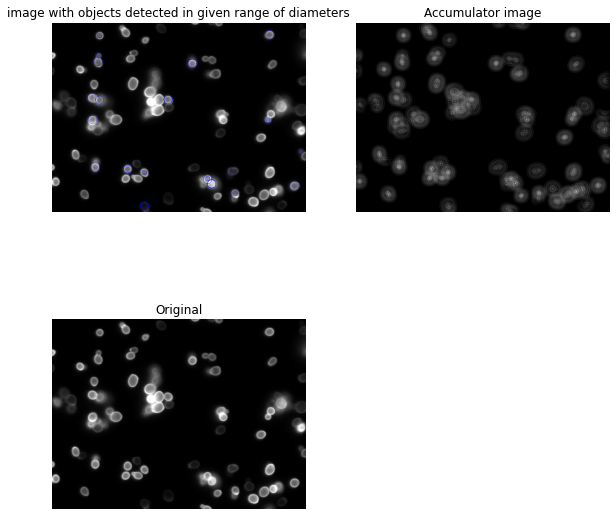

In [101]:
img3 = cv2.imread('/content/dataset/cells.png')
edgeDetected3 = cv2.Canny (img3 , 50 , 150)
indices3, accumulatorImage3 = circular_detection(edgeDetected3 , [ 15 , 25 ]) # circles 15-25

for x , y , r in indices3 :
    cv2.circle(img3 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(img3)
axis('off')
title('image with objects detected in given range of diameters')

fig.add_subplot(2, 2, 2)
imshow(accumulatorImage3, cmap="gray")
axis('off')
title('Accumulator image')

fig.add_subplot(2, 2, 3)
imshow(image3)
axis('off')
title('Original')

# fig.add_subplot(2, 2, 4)
# imshow(nms3)
# axis('off')
# title('Non-Maximum suppression')

show()

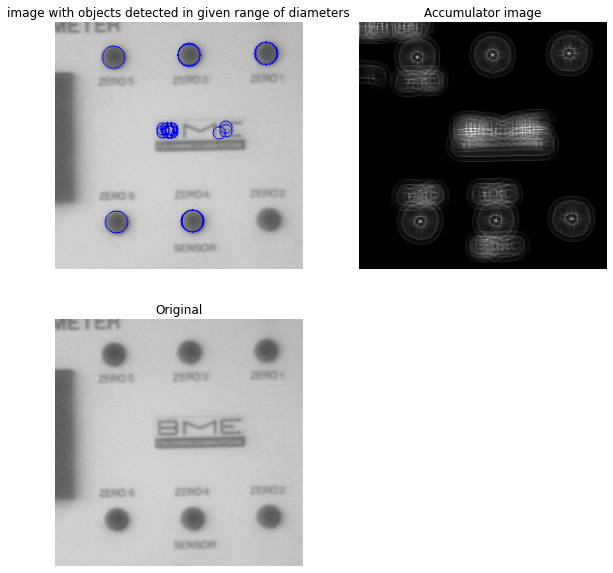

In [104]:
img4 = cv2.imread('/content/dataset/circles.png')
edgeDetected4 = cv2.Canny(img4 , 50 , 150)
indices4, accumulatorImage4 = circular_detection(edgeDetected4, [ 15 , 25 ]) # circles 15-25

for x , y , r in indices4 :
    cv2.circle(img4 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(img4)
axis('off')
title('image with objects detected in given range of diameters')

fig.add_subplot(2, 2, 2)
imshow(accumulatorImage4, cmap="gray")
axis('off')
title('Accumulator image')

fig.add_subplot(2, 2, 3)
imshow(image4)
axis('off')
title('Original')

show()